# Data preprocessing

In [93]:
!pip install PyDrive

In [94]:
!pip install httplib2==0.15.0

In [0]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [96]:
!pip install xgboost
from xgboost import XGBClassifier

In [0]:
import xgboost

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import csv
import datetime
import random
import time


In [0]:
import xgboost
import sklearn
import sklearn.metrics 
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from itertools import compress
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [0]:
pd.set_option('display.max_rows', 1000001)
pd.set_option('display.max_columns', 1000001)
pd.set_option('max_colwidth', 1000)
pd.options.display.float_format = "{:.2f}".format

In [0]:

X = drive.CreateFile({'id': '1j7ozXxMSou-OKgga5Kw09Ii3w2TeUNii'})
X.GetContentFile('datadataF.csv')
X = pd.read_csv('datadataF.csv')
X = X.drop('Unnamed: 0', axis=1)

In [0]:
X = X.drop('Decision', axis=1)

In [0]:
X['Acceptance Score 2'] = (X['ed_rank']*0.09)+
(X['annual_inc_rank']*0.08)+ 
(X['debt_inc_rank']*0.15)+ 
(X['credit_util_rank']*0.08)+ 
(X['home_ownership_rank']*0.07)+ 
(X['emp_status_rank']*0.07)+ 
(X['job_title_rank']*0.04)+ 
(X['married_rank']*0.06)+ 
(X['children_rank']*0.06)+ 
(X['loan_length_rank']*0.05)+ 
(X['home_value_rank']*0.03)+ 
(X['home_equity_rank']*0.07)+ 
(X['age_rank']*0.02)+ 
(X['empl_length_rank']*0.03)+ 
(X['loan_amount_rank']*0.10)

In [0]:
def fix_decision_2(row):
  if row['Acceptance Score 2'] >= 7:
    return 1
  else:
    return 0

In [0]:
X['Final Decision 2'] = X.apply(fix_decision_2,axis=1)

In [123]:
X

,id,ed_rank,age_rank,credit_util_rank,loan_length_rank,children_rank,debt_inc_rank,annual_inc_rank,emp_status_rank,gender_rank,home_equity_rank,home_ownership_rank,home_value_rank,job_title_rank,empl_length_rank,loan_amount_rank,married_rank,final_score_weight1,final_score_weight2,final_score_weight3,first_name,last_name,email,gender,emp_status,job_title,empl_length,race,ssn,State,Loan Length,ed_level,annual_inc,Monthly Income,home_ownership,open_credit_lines,age,married,children,Children Amount,Zip Code,Debt/Income Ratio,Metro,Median Zipcode Price,Home_Value,Total Credit Limit,Credit Utilization,Home Ownership,Years Home Owned,Home Equity,Loan_Amount,New Loan Monthly Cost Best Case,Total Credit Balance,Monthly Debt,Credit Line 1 age,Credit Line 2 age,Credit Line 3 age,Credit Line 4 age,Credit Line 5 age,Length of Credit History (avg credit lifespan in yrs),Credit Mix (# of types of credit),Recent Activity - Time since newest acct,Recent Activity - # accts applied in last year,Payment History - # payments currently past due,Payment History - # yrs ago last payment missed,Payment History - Bankruptcy/Reposession/Acct_in_Collection in past,Acceptance Score,Final Decision,Acceptance Score 2,Final Decision 2
0,1,2,8,7,8,10,0,2,10,10,0,5,0,9,6,4,0,5.62,5.07,6.02,Lisa,Jackson,fnielsen@owens-martin.com,F,Fulltime,First/Mid Level Officials and Manager,6,Other,097-71-7287,Alaska,47,2,41001,15750.00,False,4,29,False,False,0,99688,0.61,Anchorage,174354,0,38718.00,0.17,Rent,0,0.00,17950,404.83,6773,9616,4,4,2,4,4,3,4,2,0,0,1,False,2.90,0,4.05,0
1,2,8,6,10,4,8,10,2,4,0,10,10,2,9,8,4,10,7.38,8.12,7.81,Daniel,Hughes,robinjohns@yahoo.com,M,Parttime,Professional,19,Asian,158-82-3598,New Jersey,22,4,38903,15250.00,True,5,61,True,True,1,7980,0.10,New York-Newark-Jersey City,472328,363093,28953.00,0.03,Own,5,60515.50,21530,1037.35,801,1521,39,25,24,25,28,28,5,24,2,0,4,False,8.55,1,7.32,1
2,3,4,8,5,6,10,5,0,0,0,0,0,0,0,0,4,10,4.00,4.01,4.66,Katherine,Arnold,wrightana@yahoo.com,M,Student,NaN,0,Asian,568-37-8039,North Carolina,32,3,0,10916.67,False,4,29,True,False,0,28791,0.22,Asheville,274326,0,5194.80,0.33,Other,0,0.00,18640,617.45,1696,2400,4,3,3,3,3,3,4,3,0,0,1,False,5.00,0,3.57,0
3,4,10,8,7,10,10,0,0,2,10,0,5,0,0,0,4,0,4.50,4.17,4.51,Tracy,Harris,ghernandez@hotmail.com,F,Unemployed,NaN,0,White,840-40-7627,New Mexico,55,5,0,7500.00,False,5,30,False,False,0,87749,2.12,NaN,147420,0,50166.00,0.18,Rent,0,0.00,22410,431.90,8924,15886,6,11,7,9,6,7,5,6,1,1,1,False,2.45,0,3.61,0
4,5,8,10,7,8,6,10,0,2,0,10,10,2,0,0,4,10,6.19,6.94,6.58,Ernest,Townsend,danielbaldwin@avery-mccoy.com,M,Unemployed,NaN,0,Asian,892-99-9947,Nevada,47,4,0,20083.33,True,3,43,True,True,2,89107,0.03,Las Vegas-Henderson-Paradise,230192,224593,5562.00,0.05,Own,2,14972.87,22330,503.61,287,672,21,21,15,12,9,19,2,15,0,0,0,False,8.45,1,6.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999996,0,6,0,8,10,10,2,10,0,0,5,0,9,10,4,10,5.38,4.83,5.59,Maria,Parker,hopkinsbreanna@yahoo.com,M,Fulltime,First/Mid Level Officials and Manager,28,White,234-08-2840,Connecticut,39,1,30903,4000.00,False,0,61,True,False,0,6111,0.00,Hartford-West Hartford-East Hartford,222588,0,0.00,0.00,Rent,0,0.00,19160,520.76,0,0,0,0,0,0,0,0,0,0,0,0,0,False,6.40,0,5.49,0
2999996,2999997,0,10,0,2,10,10,0,10,10,10,10,2,5,6,4,10,6.56,5.64,5.80,Maureen,Lopez,powelltara@yahoo.com,F,Fulltime,Service Worker,6,Asian,329-55-4505,Alaska,12,1,24224,2583.33,True,0,50,True,False,0,99701,0.00,Fairbanks,197330,115320,0.00,0.00,Own,7,26908.00,20090,1774.62,0,0,0,0,0,0,0,0,0,0,1,0,0,False,6.90,0,5.94,0
2999997,2999998,2,8,5,2,10,1,2,10,0,0,5,0,8,6,4,10,4.44,3.88,4.71,Carolyn,Ayala,jenniferburke@hotmail.com,M,Fulltime,Technician,6,Black,601-32-3429,Idaho,12,2,43493,2916.67,False,4,29,True,False,

In [0]:
X = X.drop(['ed_rank',
 'age_rank',
 'credit_util_rank',
 'loan_length_rank',
 'children_rank',
 'debt_inc_rank',
 'annual_inc_rank',
 'emp_status_rank',
 'gender_rank',
 'home_equity_rank',
 'home_ownership_rank',
 'home_value_rank',
 'job_title_rank',
 'empl_length_rank',
 'loan_amount_rank',
 'married_rank',
 'final_score_weight1',
 'final_score_weight2',
 'final_score_weight3',
 'first_name',
 'last_name',
 'email', 'Credit Line 1 age',
 'Credit Line 2 age',
 'Credit Line 3 age',
 'Credit Line 4 age',
 'Credit Line 5 age'],axis=1)

In [0]:
li = [] 
for i in X.columns:
  li.append(i)

In [126]:
li

['id',
 'gender',
 'emp_status',
 'job_title',
 'empl_length',
 'race',
 'ssn',
 'State',
 'Loan Length',
 'ed_level',
 'annual_inc',
 'Monthly Income',
 'home_ownership',
 'open_credit_lines',
 'age',
 'married',
 'children',
 'Children Amount',
 'Zip Code',
 'Debt/Income Ratio',
 'Metro',
 'Median Zipcode Price',
 'Home_Value',
 'Total Credit Limit',
 'Credit Utilization',
 'Home Ownership',
 'Years Home Owned',
 'Home Equity',
 'Loan_Amount',
 'New Loan Monthly Cost Best Case',
 'Total Credit Balance',
 'Monthly Debt',
 'Length of Credit History (avg credit lifespan in yrs)',
 'Credit Mix (# of types of credit)',
 'Recent Activity - Time since newest acct',
 'Recent Activity - # accts applied in last year',
 'Payment History - # payments currently past due',
 'Payment History - # yrs ago last payment missed',
 'Payment History -  Bankruptcy/Reposession/Acct_in_Collection in past',
 'Acceptance Score',
 'Final Decision',
 'Acceptance Score 2',
 'Final Decision 2']

In [0]:
k = ['emp_status','gender','job_title','home_ownership','married','children','Home Ownership']
x = pd.concat([pd.get_dummies(X[col]) for col in k], axis=1, keys=k)

In [0]:
everything = pd.concat([X,x], axis=1)

In [0]:
k = ['emp_status','gender','job_title','home_ownership','married','children','Children Amount','Home Ownership']
for i in k:
  everything = everything.drop(i,axis=1)

In [130]:
everything.describe()

,id,empl_length,Loan Length,ed_level,annual_inc,Monthly Income,open_credit_lines,age,Zip Code,Debt/Income Ratio,Median Zipcode Price,Home_Value,Total Credit Limit,Credit Utilization,Years Home Owned,Home Equity,Loan_Amount,New Loan Monthly Cost Best Case,Total Credit Balance,Monthly Debt,Length of Credit History (avg credit lifespan in yrs),Credit Mix (# of types of credit),Recent Activity - Time since newest acct,Recent Activity - # accts applied in last year,Payment History - # payments currently past due,Payment History - # yrs ago last payment missed,Acceptance Score,Final Decision,Acceptance Score 2,Final Decision 2,"(emp_status, Fulltime)","(emp_status, Parttime)","(emp_status, Student)","(emp_status, Unemployed)","(gender, F)","(gender, M)","(job_title, Administrative Support Worker)","(job_title, Craft Worker)","(job_title, Executive/Senior Level Officials and Manager)","(job_title, First/Mid Level Officials and Manager)","(job_title, Laborers and Helper)","(job_title, Operative)","(job_title, Professional)","(job_title, Sales Worker)","(job_title, Service Worker)","(job_title, Technician)","(home_ownership, False)","(home_ownership, True)","(married, False)","(married, True)","(children, False)","(children, True)","(Home Ownership, Other)","(Home Ownership, Own)","(Home Ownership, Rent)"
count,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00
mean,1500000.50,8.14,32.27,3.00,63657.04,6806.33,2.50,44.51,50535.96,0.32,236196.47,101150.13,8619.79,0.10,2.96,23304.35,21001.61,924.98,1067.43,2154.38,12.00,1.83,9.65,0.54,0.47,1.24,5.37,0.25,5.35,0.10,0.77,0.10,0.04,0.10,0.50,0.50,0.06,0.07,0.05,0.07,0.07,0.06,0.06,0.07,0.06,0.07,0.50,0.50,0.50,0.50,0.50,0.50,0.07,0.43,0.50
std,866025.55,8.11,15.63,1.41,56387.77,4676.67,1.71,12.12,30190.10,0.50,199968.74,184849.63,14526.69,0.11,4.58,53736.77,4999.91,586.41,2584.81,4384.10,9.78,1.36,8.44,0.73,0.94,2.06,2.03,0.43,1.24,0.29,0.42,0.29,0.19,0.29,0.50,0.50,0.25,0.25,0.23,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.26,0.49,0.50
min,1.00,0.00,12.00,1.00,0.00,2083.33,0.00,24.00,501.00,0.00,11266.00,0.00,0.00,0.00,0.00,0.00,1020.00,18.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,750000.75,0.00,17.00,2.00,28501.00,3666.67,1.00,34.00,25311.00,0.01,116598.00,0.00,477.00,0.01,0.00,0.00,17630.00,478.22,15.00,59.00,3.00,1.00,2.00,0.00,0.00,0.00,3.20,0.00,4.49,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1500000.50,7.00,32.00,3.00,46006.00,5250.00,2.00,45.00,52533.00,0.11,186215.00,0.00,3382.20,0.06,0.00,0.00,21000.00,706.15,207.00,596.00,11.00,2.00,8.00,0.00,0.00,0.00,6.15,0.00,5.36,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
75%,2250000.25,14.00,46.00,4.00,86910.00,7000.00,4.00,55.00,76701.00,0.40,286799.00,151793.25,10395.00,0.16,5.00,25737.76,24380.00,1259.63,965.00,2280.00,20.00,3.00,15.00,1.00,1.00,1.00,7.00,1.00,6.23,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
max,3000000.00,29.00,60.00,5.00,250000.00,20833.33,5.00,65.00,99901.00,5.01,5498365.00,8143881.00,200493.00,0.49,17.00,3232882.80,45430.00,3977.65,87566.00,93948.

In [131]:
for col in everything.columns:
  print(col)

id
empl_length
race
ssn
State
Loan Length
ed_level
annual_inc
Monthly Income
open_credit_lines
age
Zip Code
Debt/Income Ratio
Metro
Median Zipcode Price
Home_Value
Total Credit Limit
Credit Utilization
Years Home Owned
Home Equity
Loan_Amount
New Loan Monthly Cost Best Case
Total Credit Balance
Monthly Debt
Length of Credit History (avg credit lifespan in yrs)
Credit Mix (# of types of credit)
Recent Activity - Time since newest acct
Recent Activity - # accts applied in last year
Payment History - # payments currently past due
Payment History - # yrs ago last payment missed
Payment History -  Bankruptcy/Reposession/Acct_in_Collection in past
Acceptance Score
Final Decision
Acceptance Score 2
Final Decision 2
('emp_status', 'Fulltime')
('emp_status', 'Parttime')
('emp_status', 'Student')
('emp_status', 'Unemployed')
('gender', 'F')
('gender', 'M')
('job_title', 'Administrative Support Worker')
('job_title', 'Craft Worker')
('job_title', 'Executive/Senior Level Officials and Manager')
('

# Creating train and test sets (70/30 split) 

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(everything, test_size=0.3)

In [133]:
train.describe()

,id,empl_length,Loan Length,ed_level,annual_inc,Monthly Income,open_credit_lines,age,Zip Code,Debt/Income Ratio,Median Zipcode Price,Home_Value,Total Credit Limit,Credit Utilization,Years Home Owned,Home Equity,Loan_Amount,New Loan Monthly Cost Best Case,Total Credit Balance,Monthly Debt,Length of Credit History (avg credit lifespan in yrs),Credit Mix (# of types of credit),Recent Activity - Time since newest acct,Recent Activity - # accts applied in last year,Payment History - # payments currently past due,Payment History - # yrs ago last payment missed,Acceptance Score,Final Decision,Acceptance Score 2,Final Decision 2,"(emp_status, Fulltime)","(emp_status, Parttime)","(emp_status, Student)","(emp_status, Unemployed)","(gender, F)","(gender, M)","(job_title, Administrative Support Worker)","(job_title, Craft Worker)","(job_title, Executive/Senior Level Officials and Manager)","(job_title, First/Mid Level Officials and Manager)","(job_title, Laborers and Helper)","(job_title, Operative)","(job_title, Professional)","(job_title, Sales Worker)","(job_title, Service Worker)","(job_title, Technician)","(home_ownership, False)","(home_ownership, True)","(married, False)","(married, True)","(children, False)","(children, True)","(Home Ownership, Other)","(Home Ownership, Own)","(Home Ownership, Rent)"
count,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00,2100000.00
mean,1500115.07,8.15,32.27,3.00,63634.41,6805.02,2.50,44.51,50544.74,0.32,236293.25,101282.04,8619.40,0.10,2.96,23338.59,21003.68,924.98,1068.51,2155.93,12.00,1.83,9.65,0.54,0.47,1.24,5.37,0.25,5.35,0.10,0.77,0.10,0.04,0.10,0.50,0.50,0.06,0.06,0.05,0.07,0.07,0.06,0.07,0.06,0.06,0.07,0.50,0.50,0.50,0.50,0.50,0.50,0.07,0.43,0.50
std,865995.44,8.12,15.63,1.41,56375.53,4675.46,1.71,12.12,30193.10,0.50,200268.08,185210.51,14518.22,0.11,4.58,53850.97,5002.22,586.38,2587.71,4385.40,9.78,1.36,8.43,0.73,0.94,2.06,2.03,0.43,1.24,0.29,0.42,0.29,0.19,0.29,0.50,0.50,0.25,0.25,0.23,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.26,0.49,0.50
min,2.00,0.00,12.00,1.00,0.00,2083.33,0.00,24.00,501.00,0.00,11266.00,0.00,0.00,0.00,0.00,0.00,1020.00,18.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,750257.75,0.00,17.00,2.00,28498.00,3666.67,1.00,34.00,25314.00,0.01,116617.75,0.00,472.50,0.01,0.00,0.00,17630.00,478.35,15.00,58.00,3.00,1.00,2.00,0.00,0.00,0.00,3.20,0.00,4.49,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1500257.50,7.00,31.00,3.00,45982.00,5250.00,2.00,45.00,52535.00,0.11,186289.00,0.00,3379.50,0.06,0.00,0.00,21000.00,706.23,206.00,595.00,11.00,2.00,8.00,0.00,0.00,0.00,6.15,0.00,5.36,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
75%,2250131.25,14.00,46.00,4.00,86890.00,7000.00,4.00,55.00,76834.00,0.40,286825.00,151917.00,10400.40,0.16,5.00,25792.00,24380.00,1259.56,965.00,2282.00,20.00,3.00,15.00,1.00,1.00,1.00,7.00,1.00,6.23,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
max,3000000.00,29.00,60.00,5.00,250000.00,20833.33,5.00,65.00,99901.00,5.01,5498365.00,8099510.00,200493.00,0.49,17.00,3232882.80,45430.00,3818.65,79800.00,93948.

In [134]:
test.describe()

,id,empl_length,Loan Length,ed_level,annual_inc,Monthly Income,open_credit_lines,age,Zip Code,Debt/Income Ratio,Median Zipcode Price,Home_Value,Total Credit Limit,Credit Utilization,Years Home Owned,Home Equity,Loan_Amount,New Loan Monthly Cost Best Case,Total Credit Balance,Monthly Debt,Length of Credit History (avg credit lifespan in yrs),Credit Mix (# of types of credit),Recent Activity - Time since newest acct,Recent Activity - # accts applied in last year,Payment History - # payments currently past due,Payment History - # yrs ago last payment missed,Acceptance Score,Final Decision,Acceptance Score 2,Final Decision 2,"(emp_status, Fulltime)","(emp_status, Parttime)","(emp_status, Student)","(emp_status, Unemployed)","(gender, F)","(gender, M)","(job_title, Administrative Support Worker)","(job_title, Craft Worker)","(job_title, Executive/Senior Level Officials and Manager)","(job_title, First/Mid Level Officials and Manager)","(job_title, Laborers and Helper)","(job_title, Operative)","(job_title, Professional)","(job_title, Sales Worker)","(job_title, Service Worker)","(job_title, Technician)","(home_ownership, False)","(home_ownership, True)","(married, False)","(married, True)","(children, False)","(children, True)","(Home Ownership, Other)","(Home Ownership, Own)","(Home Ownership, Rent)"
count,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00
mean,1499733.17,8.14,32.27,3.00,63709.84,6809.39,2.50,44.50,50515.48,0.32,235970.66,100842.33,8620.71,0.10,2.96,23224.45,20996.78,924.97,1064.90,2150.76,12.01,1.83,9.66,0.54,0.47,1.24,5.37,0.25,5.35,0.10,0.77,0.10,0.04,0.10,0.50,0.50,0.06,0.07,0.05,0.06,0.06,0.07,0.06,0.07,0.07,0.07,0.50,0.50,0.50,0.50,0.50,0.50,0.07,0.43,0.50
std,866096.23,8.11,15.63,1.41,56416.34,4679.50,1.71,12.12,30183.10,0.50,199268.47,184004.56,14546.44,0.11,4.58,53469.32,4994.50,586.47,2578.03,4381.07,9.78,1.36,8.44,0.73,0.94,2.07,2.03,0.43,1.25,0.29,0.42,0.29,0.19,0.29,0.50,0.50,0.25,0.25,0.23,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.26,0.49,0.50
min,1.00,0.00,12.00,1.00,0.00,2083.33,0.00,24.00,501.00,0.00,11266.00,0.00,0.00,0.00,0.00,0.00,1020.00,22.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,749358.50,0.00,17.00,2.00,28505.75,3666.67,1.00,34.00,25302.00,0.01,116573.00,0.00,483.30,0.01,0.00,0.00,17630.00,477.90,15.00,60.00,3.00,1.00,2.00,0.00,0.00,0.00,3.20,0.00,4.49,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1499473.50,7.00,32.00,3.00,46065.00,5250.00,3.00,45.00,52405.00,0.11,186172.00,0.00,3388.50,0.06,0.00,0.00,20990.00,705.96,208.00,600.00,11.00,2.00,8.00,0.00,0.00,0.00,6.15,0.00,5.36,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
75%,2249692.75,14.00,46.00,4.00,86950.00,7000.00,4.00,55.00,76633.00,0.40,286718.00,151489.25,10378.80,0.16,5.00,25611.25,24360.00,1260.09,966.00,2276.00,20.00,3.00,15.00,1.00,1.00,1.00,7.00,1.00,6.23,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
max,2999998.00,29.00,60.00,5.00,249998.00,20833.33,5.00,65.00,99901.00,4.88,5498365.00,8143881.00,197559.00,0.49,17.00,2251903.47,45120.00,3977.65,87566.00,92794.00,41.00,5.00,41.00,4.00,5.00,10.00,10.00,1.00,9.56,1.0

In [0]:
X_train = train.drop(['Acceptance Score','Final Decision','id','Zip Code','race','ssn','State','Metro','Acceptance Score 2','Final Decision 2'],axis=1).values
Y_train = train['Final Decision 2'].values
X_test = test.drop(['Acceptance Score','Final Decision','id','Zip Code','race','ssn','State','Metro','Acceptance Score 2','Final Decision 2'],axis=1).values
y_test = test['Final Decision 2'].values

In [0]:
X_train_nocredit = train.drop(['Acceptance Score','Final Decision','id','Zip Code','race','ssn','State','Metro','Acceptance Score 2','Final Decision 2',
                               'Length of Credit History (avg credit lifespan in yrs)',
                                'Credit Mix (# of types of credit)',
                                'Recent Activity - Time since newest acct',
                                'Recent Activity - # accts applied in last year',
                                'Payment History - # payments currently past due',
                                'Payment History - # yrs ago last payment missed',
                                'Payment History -  Bankruptcy/Reposession/Acct_in_Collection in past'],axis=1).values
Y_train_nocredit = train['Final Decision 2'].values
X_test_nocredit = test.drop(['Acceptance Score','Final Decision','id','Zip Code','race','ssn','State','Metro','Acceptance Score 2','Final Decision 2','Length of Credit History (avg credit lifespan in yrs)',
                              'Credit Mix (# of types of credit)',
                              'Recent Activity - Time since newest acct',
                              'Recent Activity - # accts applied in last year',
                              'Payment History - # payments currently past due',
                              'Payment History - # yrs ago last payment missed',
                              'Payment History -  Bankruptcy/Reposession/Acct_in_Collection in past'],axis=1).values
y_test_nocredit = test['Final Decision 2'].values

In [137]:
X_train

array([[17, 16, 3, ..., 0, 0, 1],
       [6, 15, 2, ..., 0, 1, 0],
       [7, 15, 3, ..., 0, 0, 1],
       ...,
       [27, 57, 5, ..., 0, 0, 1],
       [4, 45, 1, ..., 0, 1, 0],
       [0, 32, 1, ..., 0, 0, 1]], dtype=object)

# Training XGBoost model

In [0]:
model_nocredit = XGBClassifier()

Time is in seconds below...

In [150]:
start = time.time()
print("Starting Training...\n")
model_nocredit.fit(X_train_nocredit,Y_train_nocredit)
print("------------------------------------------------\nDone!\n\nElapsed Time: ")
end = time.time()
print(end - start)

Starting Training...

------------------------------------------------
Done!

Elapsed Time: 
371.32266306877136


In [0]:
Y_pred_nocredit = model_nocredit.predict(X_test_nocredit)

In [152]:
acc = accuracy_score(y_test_nocredit,Y_pred_nocredit)
print("Accuracy: %.2f" % (acc*100),'%')

Accuracy: 97.18 %


In [173]:
xgg_pred = pd.DataFrame(Y_pred_nocredit)
xgg_pred = xgg_pred.rename(columns={0:"XGB Decision"})
xgg_pred.groupby('XGB Decision')['XGB Decision'].count()

XGB Decision
0    829184
1     70816
Name: XGB Decision, dtype: int64

In [0]:
pred_act = pd.concat([xgg_pred,test['Final Decision 2']],axis=1)

In [176]:
pred_act.groupby('Final Decision 2').count()

,XGB Decision
Final Decision 2,
0.00,244509
1.00,25768


In [177]:
pred_act.groupby('XGB Decision').count()

,Final Decision 2
XGB Decision,
0.00,249225
1.00,21052


# Training Naive Bayes Model

In [0]:
from sklearn.naive_bayes import GaussianNB

In [52]:
naive_model_nocredit = GaussianNB()
start = time.time()
print("Starting Training...\n")
naive_model_nocredit.fit(X_train_nocredit,Y_train_nocredit)
print("------------------------------------------------\nDone!\n\nElapsed Time: ")
end = time.time()
print(end - start)

Starting Training...

------------------------------------------------
Done!

Elapsed Time: 
1.3874843120574951


In [0]:
Y_pred_naive_nocredit = naive_model_nocredit.predict(X_test_nocredit)

In [56]:
acc = accuracy_score(y_test_nocredit,Y_pred_naive_nocredit)
print("Accuracy naive bayes no credit: %.2f" % (acc*100),'%')

Accuracy naive bayes no credit: 77.36 %


# Training Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [75]:
logreg_nocredit = LogisticRegression()
start = time.time()
print("Starting Training...\n")
logreg_nocredit.fit(X_train_nocredit, Y_train_nocredit)
print("------------------------------------------------\nDone!\n\nElapsed Time: ")
end = time.time()
print(end - start)

Starting Training...

------------------------------------------------
Done!

Elapsed Time: 
40.82137179374695


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
Y_pred_logreg_nocredit = logreg_nocredit.predict(X_test_nocredit)

In [79]:
acc = accuracy_score(y_test_nocredit,Y_pred_logreg_nocredit)
print("Accuracy logreg: %.2f" % (acc*100),'%')

Accuracy logreg: 91.60 %


# Plotting Trees (XGBoost)

#### If x is one of the leaf values shown, we can find the probability of a datapoint being class 1 (approved) using: 

1/(1+np.exp(-1*-x))

### First Tree

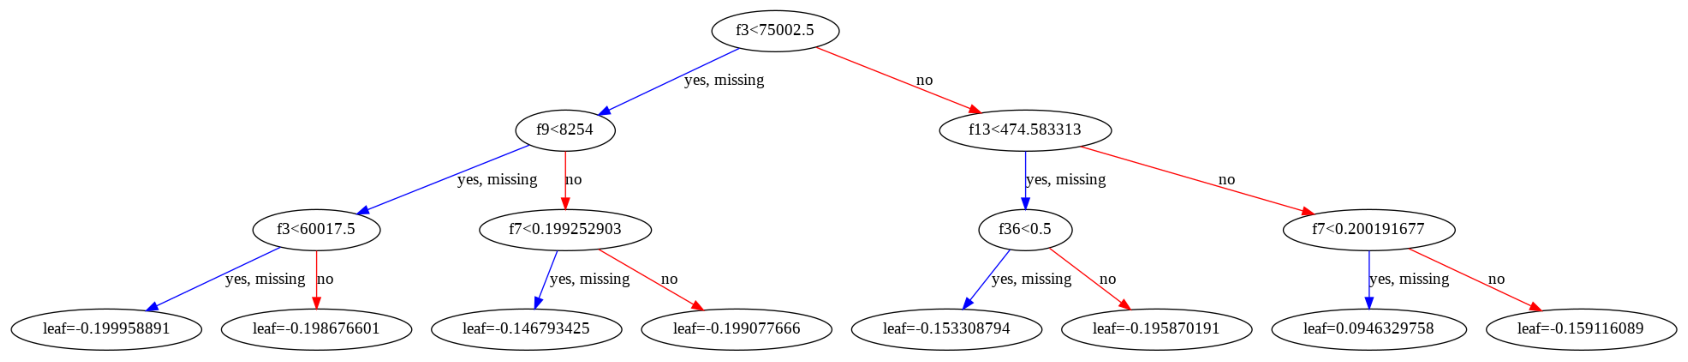

In [164]:
rcParams['figure.figsize'] = 30,30
xgboost.plot_tree(model_nocredit,num_trees=0)

### Last Tree

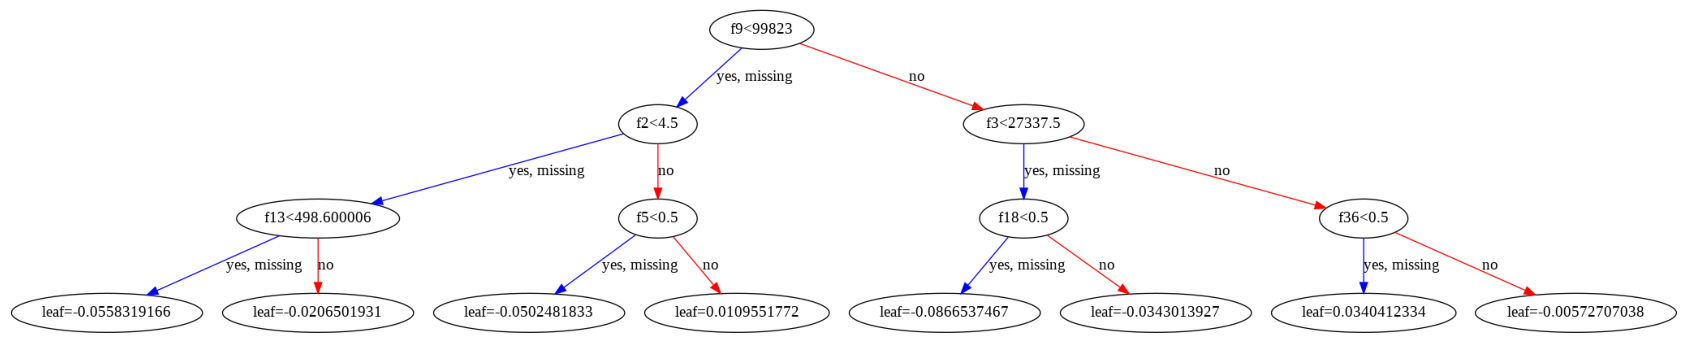

In [165]:
rcParams['figure.figsize'] = 30,30
xgboost.plot_tree(model_nocredit,num_trees=99)

# fico based decision

In [0]:
X_test_fico.head()

,Length of Credit History (avg credit lifespan in yrs),Credit Mix (# of types of credit),Recent Activity - Time since newest acct,Recent Activity - # accts applied in last year,Payment History - # payments currently past due,Payment History - # yrs ago last payment missed,Payment History - Bankruptcy/Reposession/Acct_in_Collection in past,Credit Utilization,FICO
0,8,5,3,0,0,0,True,0.01,731.00
1,16,1,16,0,0,3,False,0.04,700.00
2,31,1,28,1,0,0,False,0.12,712.00
3,7,1,7,1,0,0,False,0.02,746.00
4,0,0,0,1,0,0,False,0.00,680.00


In [0]:
X_test_fico.describe()

,Length of Credit History (avg credit lifespan in yrs),Credit Mix (# of types of credit),Recent Activity - Time since newest acct,Recent Activity - # accts applied in last year,Payment History - # payments currently past due,Payment History - # yrs ago last payment missed,Credit Utilization,FICO
count,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00,900000.00
mean,12.00,1.83,9.65,0.54,0.47,1.24,0.10,685.04
std,9.78,1.36,8.43,0.73,0.94,2.07,0.11,56.35
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,410.00
25%,3.00,1.00,2.00,0.00,0.00,0.00,0.01,649.00
50%,11.00,2.00,8.00,0.00,0.00,0.00,0.06,685.00
75%,20.00,3.00,15.00,1.00,1.00,1.00,0.16,729.00
max,41.00,5.00,41.00,4.00,5.00,10.00,0.49,823.00


In [0]:
X_test_fico.groupby(pd.cut(X_test_fico["FICO"], np.arange(300, 850+50, 50))).mean()

,Length of Credit History (avg credit lifespan in yrs),Credit Mix (# of types of credit),Recent Activity - Time since newest acct,Recent Activity - # accts applied in last year,Payment History - # payments currently past due,Payment History - # yrs ago last payment missed,Payment History - Bankruptcy/Reposession/Acct_in_Collection in past,Credit Utilization,FICO
FICO,,,,,,,,,
"(300, 350]",nan,nan,nan,nan,nan,nan,nan,nan,nan
"(350, 400]",nan,nan,nan,nan,nan,nan,nan,nan,nan
"(400, 450]",10.90,1.59,8.89,0.84,3.51,1.00,0.98,0.42,437.61
"(450, 500]",13.27,1.80,10.76,0.72,3.01,1.02,0.63,0.39,484.82
"(500, 550]",13.60,1.89,10.94,0.63,2.44,1.05,0.18,0.36,533.28
"(550, 600]",13.78,2.03,11.00,0.59,1.83,1.22,0.09,0.27,579.90
"(600, 650]",10.95,1.63,8.77,0.59,1.03,1.83,0.03,0.15,628.99
"(650, 700]",9.23,1.38,7.46,0.59,0.37,1.21,0.01,0.08,676.64
"(700, 750]",14.35,2.08,11.76,0.53,0.03,1.46,0.00,0.09,725.14


In [0]:
def fico_decision(row):
  if row['FICO'] >= 800:
    return 1  
  elif row['FICO'] >= 740 and row['FICO'] < 800:
    if row['Payment History - # yrs ago last payment missed'] == 0 or row['Payment History - # yrs ago last payment missed'] >= 6:
      return 1
    else:
      return 0
  elif row['FICO'] >= 670 and row['FICO'] < 740:
    if row['Payment History - # yrs ago last payment missed'] == 0 or row['Payment History - # yrs ago last payment missed'] >= 6:
      if row['Payment History - # payments currently past due'] <= 1 and row['Credit Utilization'] <= 0.15:
        return 1
      else:
        return 0
    else:
      return 0
  elif row['FICO'] >= 560 and row['FICO'] < 670:
    if row['Payment History - # yrs ago last payment missed'] == 0 or row['Payment History - # yrs ago last payment missed'] >= 6:
      if row['Payment History - # payments currently past due'] == 0 and row['Credit Utilization'] <= 0.15:
        if row['Recent Activity - # accts applied in last year'] <= 1:
          return 1
        else:
          return 0
      else:
        return 0
    else:
      return 0
  else:
    return 0



In [0]:
X_test_fico['FICO Based Decision'] = X_test_fico.apply(fico_decision,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_test_fico[['FICO','FICO Based Decision']].groupby([pd.cut(X_test_fico["FICO"], np.arange(300, 850+50, 50)),'FICO Based Decision'])['FICO Based Decision'].count()


FICO        FICO Based Decision
(300, 350]  0                           0
            1                           0
(350, 400]  0                           0
            1                           0
(400, 450]  0                          61
            1                           0
(450, 500]  0                        1269
            1                           0
(500, 550]  0                       13646
            1                           0
(550, 600]  0                       53224
            1                          17
(600, 650]  0                      160430
            1                        1165
(650, 700]  0                      207240
            1                      107551
(700, 750]  0                       84011
            1                      132223
(750, 800]  0                         516
            1                      138431
(800, 850]  0                           0
            1                         216
Name: FICO Based Decision, dtype: int64

In [0]:
X_test_fico[['FICO','FICO Based Decision']].groupby(pd.cut(X_test_fico["FICO"], np.arange(300, 850+50, 50)))['FICO Based Decision'].mean()


FICO
(300, 350]    nan
(350, 400]    nan
(400, 450]   0.00
(450, 500]   0.00
(500, 550]   0.00
(550, 600]   0.00
(600, 650]   0.01
(650, 700]   0.34
(700, 750]   0.61
(750, 800]   1.00
(800, 850]   1.00
Name: FICO Based Decision, dtype: float64

In [0]:
X_test_fico['FICO Based Decision'].value_counts(normalize=True)

0   0.58
1   0.42
Name: FICO Based Decision, dtype: float64

In [0]:
X_test_fico['FICO Based Decision'].value_counts()

0    520397
1    379603
Name: FICO Based Decision, dtype: int64

In [0]:
xg_dec = pd.DataFrame(Y_pred)
xg_dec = xg_dec.rename(columns={0:"XGBoost Based Decision"})
xg_dec['XGBoost Based Decision'].value_counts(normalize=True)

0   0.92
1   0.08
Name: XGBoost Based Decision, dtype: float64

# getting results columns in one dataframe

In [0]:
results = X_test_fico['FICO Based Decision']
results.head()

0    1
1    0
2    1
3    1
4    1
Name: FICO Based Decision, dtype: int64

In [0]:
results_id = test['id']

In [0]:
results_id.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results_id,results],axis=1)

In [0]:
results.head()

,id,FICO Based Decision
0,2306153,1
1,2742880,0
2,1960543,1
3,2405658,1
4,1597534,1


In [0]:
xgg = pd.DataFrame(Y_pred)
xgg = xgg.rename(columns={0:"XGB Decision"})
xgg.head()

,XGB Decision
0,0
1,0
2,0
3,0
4,0


In [0]:
xgg.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,xgg],axis=1)

In [0]:
ficot = fico_and_id_test['FICO']

In [0]:
results =  pd.concat([results,ficot],axis=1)

In [0]:
actual_dec = pd.DataFrame(Y_test_fico)

In [0]:
actual_dec = actual_dec.rename(columns={0:"Actual Decision"})

In [0]:
actual_dec.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,actual_dec],axis=1)

In [0]:
results.head()

,id,FICO Based Decision,XGB Decision,FICO,Final Decision 2
0,2306153,1,0,731.00,0
1,2742880,0,0,700.00,0
2,1960543,1,0,712.00,0
3,2405658,1,0,746.00,0
4,1597534,1,0,680.00,0


In [0]:
results = results.astype(int)

In [0]:
results.head()

,id,FICO Based Decision,XGB Decision,FICO,Final Decision 2
0,2306153,1,0,731,0
1,2742880,0,0,700,0
2,1960543,1,0,712,0
3,2405658,1,0,746,0
4,1597534,1,0,680,0


In [0]:
X_test_fico[['FICO','FICO Based Decision']].groupby(pd.cut(X_test_fico["FICO"], np.arange(300, 850+50, 50)))['FICO Based Decision'].mean()


FICO
(300, 350]    nan
(350, 400]    nan
(400, 450]   0.00
(450, 500]   0.00
(500, 550]   0.00
(550, 600]   0.00
(600, 650]   0.01
(650, 700]   0.34
(700, 750]   0.61
(750, 800]   1.00
(800, 850]   1.00
Name: FICO Based Decision, dtype: float64

In [0]:
results[['FICO','XGB Decision']].groupby(pd.cut(X_test_fico["FICO"], np.arange(300, 850+50, 50)))['XGB Decision'].count()


FICO
(300, 350]         0
(350, 400]         0
(400, 450]        61
(450, 500]      1269
(500, 550]     13646
(550, 600]     53241
(600, 650]    161595
(650, 700]    314791
(700, 750]    216234
(750, 800]    138947
(800, 850]       216
Name: XGB Decision, dtype: int64

In [0]:
dtis = test[['Debt/Income Ratio']]

In [0]:
dtis.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,dtis],axis=1)

In [0]:
accept_score = test[['Acceptance Score 2']]

In [0]:
accept_score.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,accept_score],axis=1)

In [0]:
results.head(3)

,id,FICO Based Decision,XGB Decision,FICO,Final Decision 2,Debt/Income Ratio,Acceptance Score 2
0,2306153,1,0,731,0,0.50,3.69
1,2742880,0,0,700,0,0.03,5.05
2,1960543,1,0,712,0,0.11,5.82


In [0]:
def defaulted(row):
  if row['Acceptance Score 2'] <= 4:
    return random.choices(population=[0,1],  weights=[0.95, 0.05],  k=1)[0]
  else:
    if row['FICO'] < 520:
      return random.choices(population=[0,1],  weights=[0.41, 0.59],  k=1)[0]
    elif row['FICO'] >= 520 and row['FICO'] < 560:
      return random.choices(population=[0,1],  weights=[0.28, 0.72],  k=1)[0]
    elif row['FICO'] >= 560 and row['FICO'] < 600:
      return random.choices(population=[0,1],  weights=[0.23, 0.77],  k=1)[0]
    elif row['FICO'] >= 600 and row['FICO'] < 640:
      return random.choices(population=[0,1],  weights=[0.16, 0.84],  k=1)[0]
    elif row['FICO'] >= 640 and row['FICO'] < 680:
      return random.choices(population=[0,1],  weights=[0.9, 0.91],  k=1)[0]
    elif row['FICO'] >= 680 and row['FICO'] < 720:
      return random.choices(population=[0,1],  weights=[0.044, 0.956],  k=1)[0]
    elif row['FICO'] >= 720:
      return random.choices(population=[0,1],  weights=[0.008, 0.992],  k=1)[0]
    else:
      return 0


In [0]:
results['Defaulted (1 is DID NOT default)'] = results.apply(defaulted,axis=1)

In [0]:
def FICO_rating(row):
  if row['FICO'] < 560:
    return 'Poor'
  elif row['FICO'] >= 560 and row['FICO'] < 670:
    return 'Fair'
  elif row['FICO'] >= 670 and row['FICO'] < 740:
    return 'Good'
  elif row['FICO'] >= 740 and row['FICO'] < 800:
    return 'Very Good'
  elif row['FICO'] >= 800:
    return 'Excellent'
  else:
    return 'Poor'

In [0]:
results['FICO Rating'] = results.apply(FICO_rating,axis=1)

In [0]:
results = results[['id','FICO','FICO Rating','FICO Based Decision','XGB Decision','Defaulted (1 is DID NOT default)','Acceptance Score 2','Final Decision 2']]

In [0]:
results.head()

,id,FICO,FICO Rating,FICO Based Decision,XGB Decision,Defaulted (1 is DID NOT default),Acceptance Score 2,Final Decision 2
0,2306153,731,Good,1,0,0,3.69,0
1,2742880,700,Good,0,0,1,5.05,0
2,1960543,712,Good,1,0,1,5.82,0
3,2405658,746,Very Good,1,0,1,4.61,0
4,1597534,680,Good,1,0,1,5.01,0


In [0]:
results.corr()

,id,FICO,FICO Based Decision,XGB Decision,Defaulted (1 is DID NOT default),Acceptance Score 2,Final Decision 2
id,1.00,0.00,0.00,-0.00,0.00,0.00,-0.00
FICO,0.00,1.00,0.67,0.13,0.31,0.27,0.15
FICO Based Decision,0.00,0.67,1.00,0.08,0.27,0.20,0.10
XGB Decision,-0.00,0.13,0.08,1.00,0.11,0.52,0.83
Defaulted (1 is DID NOT default),0.00,0.31,0.27,0.11,1.00,0.46,0.12
Acceptance Score 2,0.00,0.27,0.20,0.52,0.46,1.00,0.56
Final Decision 2,-0.00,0.15,0.10,0.83,0.12,0.56,1.00


In [0]:
results[['Defaulted (1 is DID NOT default)','FICO Rating']].groupby('FICO Rating')['Defaulted (1 is DID NOT default)'].value_counts(normalize=True)

FICO Rating  Defaulted (1 is DID NOT default)
Excellent    1                                  0.98
             0                                  0.02
Fair         1                                  0.54
             0                                  0.46
Good         1                                  0.81
             0                                  0.19
Poor         0                                  0.52
             1                                  0.48
Very Good    1                                  0.92
             0                                  0.08
Name: Defaulted (1 is DID NOT default), dtype: float64

In [0]:
acc = accuracy_score(results['Defaulted (1 is DID NOT default)'].values,results['XGB Decision'].values)
print("Accuracy of XGB Decision: %.2f" % (acc*100),'%')

Accuracy of XGB Decision: 32.88 %


In [0]:
acc = accuracy_score(results['Defaulted (1 is DID NOT default)'].values,results['FICO Based Decision'].values)
print("Accuracy of FICO Based (Banker's Perspective) Decision: %.2f" % (acc*100),'%')

Accuracy of FICO Based (Banker's Perspective) Decision: 58.10 %


In [0]:
approved_xgb = results[results['XGB Decision'] == 1]
approved_fico = results[results['FICO Based Decision'] == 1]

In [0]:
approved_xgb['XGB Decision'].value_counts()

1    70698
Name: XGB Decision, dtype: int64

In [0]:
approved_fico['FICO Based Decision'].value_counts()

1    379603
Name: FICO Based Decision, dtype: int64

In [0]:
acc = accuracy_score(approved_xgb['Defaulted (1 is DID NOT default)'].values,approved_xgb['XGB Decision'].values)
print("Default Rate of XGB Decision: %.2f" % (abs((acc*100)-100)),'%')

Default Rate of XGB Decision: 10.72 %


In [0]:
acc = accuracy_score(approved_fico['Defaulted (1 is DID NOT default)'].values,approved_fico['FICO Based Decision'].values)
print("Default Rate of FICO Based (Banker's Perspective) Decision: %.2f" % (abs((acc*100)-100)),'%')

Default Rate of FICO Based (Banker's Perspective) Decision: 12.79 %


In [0]:
logg = pd.DataFrame(Y_pred_logreg)
logg = logg.rename(columns={0:"LogReg Decision"})
logg.head()

,LogReg Decision
0,0
1,0
2,0
3,0
4,0


In [0]:
logg.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,logg],axis=1)

In [0]:
naive = pd.DataFrame(Y_pred_naive)
naive = naive.rename(columns={0:"Naive Bayes Decision"})
naive.head()

,Naive Bayes Decision
0,0
1,0
2,1
3,0
4,0


In [0]:
naive.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,naive],axis=1)

In [0]:
xgb_nocredit = pd.DataFrame(Y_pred_nocredit)
xgb_nocredit = xgb_nocredit.rename(columns={0:"XGB Decision (No Credit)"})

naive_nocredit = pd.DataFrame(Y_pred_naive_nocredit)
naive_nocredit = naive_nocredit.rename(columns={0:"Naive Bayes Decision (No Credit)"})

logreg_nocredit = pd.DataFrame(Y_pred_logreg_nocredit)
logreg_nocredit = logreg_nocredit.rename(columns={0:"LogReg Decision (No Credit)"})

In [0]:
xgb_nocredit.reset_index(drop=True, inplace=True)
naive_nocredit.reset_index(drop=True, inplace=True)
logreg_nocredit.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,xgb_nocredit,naive_nocredit,logreg_nocredit],axis=1)

In [0]:
results = results[['id','FICO','FICO Rating','FICO Based Decision','XGB Decision','LogReg Decision','Naive Bayes Decision','XGB Decision (No Credit)','LogReg Decision (No Credit)','Naive Bayes Decision (No Credit)','Defaulted (1 is DID NOT default)','Acceptance Score 2','Final Decision 2']]

In [0]:
results.head(2)

,id,FICO,FICO Rating,FICO Based Decision,XGB Decision,LogReg Decision,Naive Bayes Decision,XGB Decision (No Credit),LogReg Decision (No Credit),Naive Bayes Decision (No Credit),Defaulted (1 is DID NOT default),Acceptance Score 2,Final Decision 2
0,2306153,731,Good,1,0,0,0,0,0,0,0,3.69,0
1,2742880,700,Good,0,0,0,0,0,0,0,1,5.05,0


In [0]:
approved_xgb = results[results['XGB Decision'] == 1]
approved_fico = results[results['FICO Based Decision'] == 1]
approved_logreg = results[results['LogReg Decision'] == 1]
approved_naive = results[results['Naive Bayes Decision'] == 1]
approved_xgb_nocredit = results[results['XGB Decision (No Credit)'] == 1]
approved_logreg_nocredit = results[results['LogReg Decision (No Credit)'] == 1]
approved_naive_nocredit = results[results['Naive Bayes Decision (No Credit)'] == 1]

In [0]:
acc2 = accuracy_score(approved_fico['Defaulted (1 is DID NOT default)'].values,approved_fico['FICO Based Decision'].values)
print("Default Rate of FICO Based Decision: %.2f" % (abs((acc2*100)-100)),'%')
print('---------------------------------------------------------')
acc = accuracy_score(approved_xgb['Defaulted (1 is DID NOT default)'].values,approved_xgb['XGB Decision'].values)
print("Default Rate of XGB Decision: %.2f" % (abs((acc*100)-100)),'%')

acc3 = accuracy_score(approved_logreg['Defaulted (1 is DID NOT default)'].values,approved_logreg['LogReg Decision'].values)
print("Default Rate of LogReg Decision: %.2f" % (abs((acc3*100)-100)),'%')

acc4 = accuracy_score(approved_naive['Defaulted (1 is DID NOT default)'].values,approved_naive['Naive Bayes Decision'].values)
print("Default Rate of Naive Bayes Decision: %.2f" % (abs((acc4*100)-100)),'%')
print('---------------------------------------------------------')

acc5 = accuracy_score(approved_xgb_nocredit['Defaulted (1 is DID NOT default)'].values,approved_xgb_nocredit['XGB Decision (No Credit)'].values)
print("Default Rate of XGB (No Credit) Decision: %.2f" % (abs((acc2*100)-100)),'%')

acc6 = accuracy_score(approved_logreg_nocredit['Defaulted (1 is DID NOT default)'].values,approved_logreg_nocredit['LogReg Decision (No Credit)'].values)
print("Default Rate of LogReg (No Credit) Decision: %.2f" % (abs((acc3*100)-100)),'%')

acc7 = accuracy_score(approved_naive_nocredit['Defaulted (1 is DID NOT default)'].values,approved_naive_nocredit['Naive Bayes Decision (No Credit)'].values)
print("Default Rate of Naive Bayes (No Credit) Decision: %.2f" % (abs((acc4*100)-100)),'%')

Default Rate of FICO Based Decision: 12.79 %
---------------------------------------------------------
Default Rate of XGB Decision: 10.72 %
Default Rate of LogReg Decision: 12.64 %
Default Rate of Naive Bayes Decision: 13.27 %
---------------------------------------------------------
Default Rate of XGB (No Credit) Decision: 12.79 %
Default Rate of LogReg (No Credit) Decision: 12.64 %
Default Rate of Naive Bayes (No Credit) Decision: 13.27 %


In [0]:
approved_xgb_nocredit['XGB Decision (No Credit)'].count()


70624

In [0]:
approved_xgb['XGB Decision'].count()

70698

In [0]:
approved_fico['FICO Based Decision'].count()

379603

In [0]:
results.head()

,id,FICO,FICO Rating,FICO Based Decision,XGB Decision,LogReg Decision,Naive Bayes Decision,XGB Decision (No Credit),LogReg Decision (No Credit),Naive Bayes Decision (No Credit),Defaulted (1 is DID NOT default),Acceptance Score 2,Final Decision 2
0,2306153,731,Good,1,0,0,0,0,0,0,0,3.69,0
1,2742880,700,Good,0,0,0,0,0,0,0,1,5.05,0
2,1960543,712,Good,1,0,0,1,0,0,1,1,5.82,0
3,2405658,746,Very Good,1,0,0,0,0,0,0,1,4.61,0
4,1597534,680,Good,1,0,0,0,0,0,0,1,5.01,0


# Combined Decision

In [0]:
xgb_prob = model.predict_proba(X_test)[:,1]
xgb_prob_nocredit = model_nocredit.predict_proba(X_test_nocredit)[:,1]

In [0]:
xgb_prob_df = pd.DataFrame(xgb_prob)
xgb_prob_df = xgb_prob_df.rename(columns={0:"XGB Prob"})

In [0]:
xgb_prob_nocredit_df = pd.DataFrame(xgb_prob_nocredit)
xgb_prob_nocredit_df = xgb_prob_nocredit_df.rename(columns={0:"XGB Prob (No Credit)"})

In [0]:
xgb_prob_df.reset_index(drop=True, inplace=True)
xgb_prob_nocredit_df.reset_index(drop=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [0]:
results =  pd.concat([results,xgb_prob_df,xgb_prob_nocredit_df],axis=1)

In [0]:
import math

In [0]:
results = results.loc[:,~results.columns.duplicated()]

In [0]:
def combined_score(row):
  return round((row['FICO Based Decision'] + (row['XGB Prob']*1.5)) / 2.5 * 1000)

In [0]:
def combined_score_nocredit(row):
  return round((row['FICO Based Decision'] + (row['XGB Prob (No Credit)']*1.5)) / 2.5 * 1000)

In [0]:
results['Combined Score'] = results.apply(combined_score, axis=1)

In [0]:
results['Combined Score (No Credit)'] = results.apply(combined_score_nocredit, axis=1)

In [0]:
#results = results.drop(['Combined Score','Combined Score (No Credit)'],axis=1)

In [0]:
results['Combined Score'].describe()

count   900000.00
mean       225.78
std        248.87
min          0.00
25%          1.00
50%         66.00
75%        404.00
max        997.00
Name: Combined Score, dtype: float64

In [0]:
results['Combined Score (No Credit)'].describe()

count   900000.00
mean       225.78
std        248.75
min          0.00
25%          1.00
50%         66.00
75%        404.00
max        997.00
Name: Combined Score (No Credit), dtype: float64

In [0]:
def combined_decision(row):
  if row['Combined Score'] >= 500:
    return 1
  else:
    return 0

In [0]:
def combined_decision_nocredit(row):
  if row['Combined Score (No Credit)'] >= 500:
    return 1
  else:
    return 0

In [0]:
results['Combined Decision'] = results.apply(combined_decision, axis=1)

In [0]:
results['Combined Decision (No Credit)'] = results.apply(combined_decision_nocredit, axis=1)

In [0]:
approved_combined_decision = results[results['Combined Decision'] == 1]
approved_combined_decision_nocredit = results[results['Combined Decision (No Credit)'] == 1]

In [0]:
acc = accuracy_score(approved_combined_decision['Defaulted (1 is DID NOT default)'].values,approved_combined_decision['Combined Decision'].values)
print("Default Rate of Combined Decision: %.2f" % (abs((acc*100)-100)),'%')

acc = accuracy_score(approved_combined_decision_nocredit['Defaulted (1 is DID NOT default)'].values,approved_combined_decision_nocredit['Combined Decision (No Credit)'].values)
print("Default Rate of Combined Decision (No Credit): %.2f" % (abs((acc*100)-100)),'%')

Default Rate of Combined Decision: 6.16 %
Default Rate of Combined Decision (No Credit): 6.16 %


In [0]:
approved_combined_decision['Combined Decision'].count()

86062

In [0]:
approved_combined_decision_nocredit['Combined Decision (No Credit)'].count()

86201

In [0]:
results.head()

,id,FICO,FICO Rating,FICO Based Decision,XGB Decision,LogReg Decision,Naive Bayes Decision,XGB Decision (No Credit),LogReg Decision (No Credit),Naive Bayes Decision (No Credit),Defaulted (1 is DID NOT default),Acceptance Score 2,Final Decision 2,XGB Prob,XGB Prob (No Credit),Combined Score,Combined Score (No Credit),Combined Decision,Combined Decision (No Credit)
0,2306153,731,Good,1,0,0,0,0,0,0,0,3.69,0,0.00,0.00,400,400,0,0
1,2742880,700,Good,0,0,0,0,0,0,0,1,5.05,0,0.00,0.00,3,2,0,0
2,1960543,712,Good,1,0,0,1,0,0,1,1,5.82,0,0.04,0.04,426,427,0,0
3,2405658,746,Very Good,1,0,0,0,0,0,0,1,4.61,0,0.00,0.00,401,401,0,0
4,1597534,680,Good,1,0,0,0,0,0,0,1,5.01,0,0.00,0.00,401,401,0,0


***
***

#Confusion Matrix - XGBoost

In [0]:
confusion_mat = confusion_matrix(y_test,Y_pred_nocredit)

Text(69.0, 0.5, 'True')

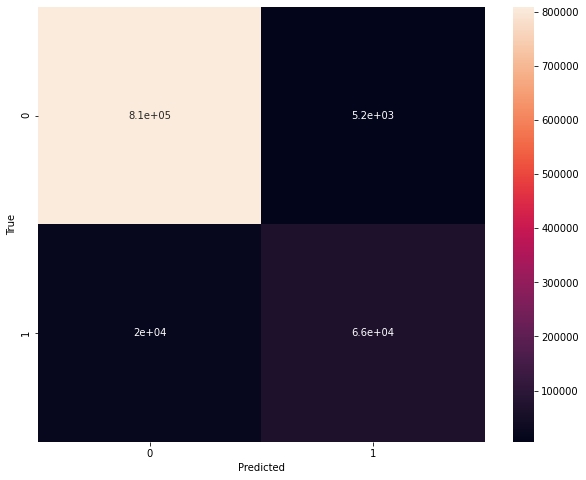

In [154]:
confusion_mat_df = pd.DataFrame(confusion_mat, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,8))
sb.heatmap(confusion_mat_df, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

***
***


# Confusion Matrix - Naive Bayes



In [0]:
confusion_mat = confusion_matrix(y_test,Y_pred_naive_nocredit)

Text(69.0, 0.5, 'True')

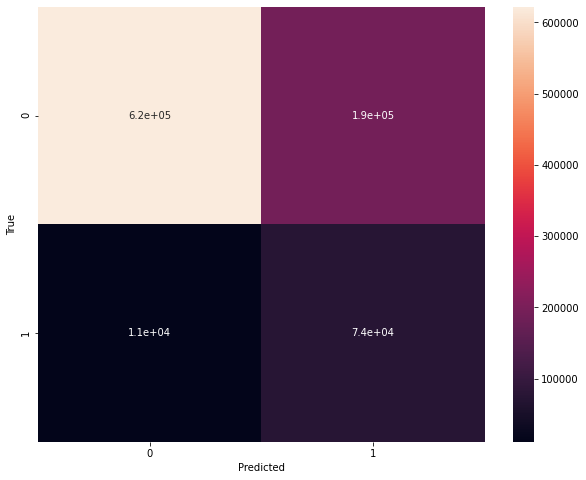

In [63]:
confusion_mat_df = pd.DataFrame(confusion_mat, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,8))
sb.heatmap(confusion_mat_df, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

# Confusion Matrix - Logistic Regression

In [0]:
confusion_mat = confusion_matrix(y_test,Y_pred_logreg_nocredit)

Text(69.0, 0.5, 'True')

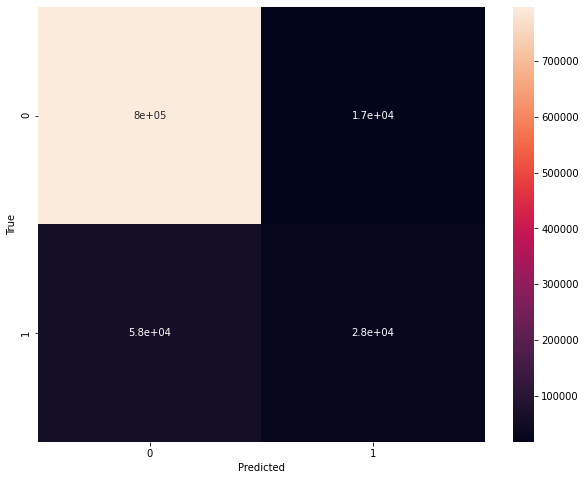

In [81]:
confusion_mat_df = pd.DataFrame(confusion_mat, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,8))
sb.heatmap(confusion_mat_df, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

***
***

#Classification accuracy - XGBoost

In [155]:
acc = accuracy_score(y_test,Y_pred_nocredit)
print("Accuracy: %.2f" % (acc*100),'%')

Accuracy: 97.18 %


# Classification Accuracy - Naive Bayes

In [64]:
acc = accuracy_score(y_test,Y_pred_naive_nocredit)
print("Accuracy: %.2f" % (acc*100),'%')

Accuracy: 77.36 %


# Classification Accuracy - Logistic Regression

In [82]:
acc = accuracy_score(y_test,Y_pred_logreg_nocredit)
print("Accuracy: %.2f" % (acc*100),'%')

Accuracy: 91.60 %


***
***
# Logarithmic loss - XGBoost

In [0]:
Y_pred_prob = model_nocredit.predict_proba(X_test_nocredit)

In [158]:
logloss = log_loss(y_test, Y_pred_prob)
print("Log-loss: %.2f" % (logloss))

Log-loss: 0.08


# Logarithmic Loss - Naive Bayes

In [0]:
Y_pred_prob = naive_model_nocredit.predict_proba(X_test_nocredit)

In [68]:
logloss = log_loss(y_test, Y_pred_prob)
print("Log-loss: %.2f" % (logloss))

Log-loss: 0.73


# Logarithmic Loss - Logistic Regression

In [0]:
Y_pred_prob = logreg_nocredit.predict_proba(X_test_nocredit)

In [84]:
logloss = log_loss(y_test, Y_pred_prob)
print("Log-loss: %.2f" % (logloss))

Log-loss: 0.21


***
***
# Area under ROC curve - XGBoost

In [159]:
Y_pred_prob_positives = Y_pred_prob[:, 1]

auc = roc_auc_score(y_test, Y_pred_prob_positives)
print('AUC: %.2f%%' % (auc*100))

AUC: 99.33%


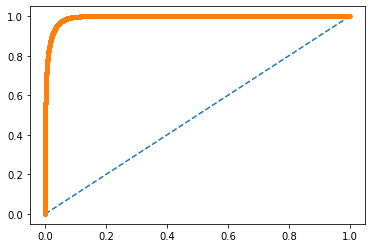

In [160]:
FPR, TPR, thresholds = roc_curve(y_test, Y_pred_prob_positives)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(FPR, TPR, marker='.')
plt.show()

# Area under ROC Curve - Naive Bayes

In [69]:
Y_pred_prob_positives = Y_pred_prob[:, 1]

auc = roc_auc_score(y_test, Y_pred_prob_positives)
print('AUC: %.2f%%' % (auc*100))

AUC - Test Set: 87.13%


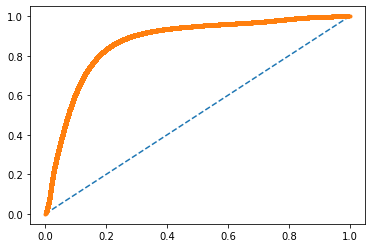

In [70]:
FPR, TPR, thresholds = roc_curve(y_test, Y_pred_prob_positives)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(FPR, TPR, marker='.')
plt.show()

# Area under ROC Curve - Logistic Regression

In [87]:
Y_pred_prob_positives = Y_pred_prob[:, 1]

auc = roc_auc_score(y_test, Y_pred_prob_positives)
print('AUC: %.2f%%' % (auc*100))

AUC: 90.22%


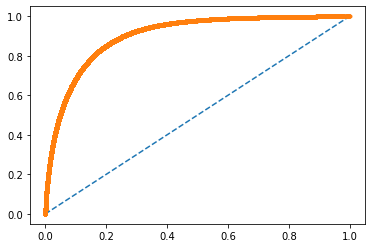

In [88]:
FPR, TPR, thresholds = roc_curve(y_test, Y_pred_prob_positives)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(FPR, TPR, marker='.')
plt.show()

***
***
# F-Measure (or F-Score) - XGBoost


In [161]:
precision = precision_score(y_test, Y_pred_nocredit)
print('Precision: %f' % precision)

Precision: 0.926288


Recall: True positives / (True positives + false negatives)

In [162]:

recall = recall_score(y_test, Y_pred_nocredit)
print('Recall: %f' % recall)

Recall: 0.765013


F1: True positives / (True positives + False positives + false negatives)

In [163]:

f1 = f1_score(y_test, Y_pred_nocredit)
print('F1 score: %f' % f1)

F1 score: 0.837961


# F-Measure (or F-Score) - Naive Bayes

In [71]:
precision = precision_score(y_test, Y_pred_naive_nocredit)
print('Precision: %f' % precision)

Precision: 0.278992


In [72]:
recall = recall_score(y_test, Y_pred_naive_nocredit)
print('Recall: %f' % recall)

Recall: 0.867773


In [73]:
f1 = f1_score(y_test, Y_pred_naive_nocredit)
print('F1 score: %f' % f1)

F1 score: 0.422234


# F-Measure (or F-Score) - Logistic Regression

In [89]:
precision = precision_score(y_test, Y_pred_logreg_nocredit)
print('Precision: %f' % precision)

Precision: 0.612865


In [90]:
recall = recall_score(y_test, Y_pred_logreg_nocredit)
print('Recall: %f' % recall)

Recall: 0.322678


In [91]:
f1 = f1_score(y_test, Y_pred_logreg_nocredit)
print('F1 score: %f' % f1)

F1 score: 0.422766


***
***

# Saving the model state



In [0]:
import pickle

In [0]:

model_nocredit.save_model('xgbmodel_nocredit.model')

In [0]:
uploaded = drive.CreateFile({'xgbmodel_nocredit.model': 'xgbmodel_nocredit.model'})
uploaded.SetContentFile('xgbmodel_nocredit.model')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1hcyZvBxmXGanVY9g7JU3hTf1IZf5OioW


# Random Forest Training 

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=3,max_depth=2)
start = time.time()
print("Starting Training...\n")
model.fit(X_train,Y_train)
print("------------------------------------------------\nDone!\n\nElapsed Time: ")
end = time.time()
print(end - start)

Starting Training...

------------------------------------------------
Done!

Elapsed Time: 
11.242786645889282


In [0]:
Y_pred_rf_nocredit = model.predict(X_test_nocredit)

In [0]:
acc = accuracy_score(y_test,Y_pred_rf_nocredit)
print("Accuracy: %.2f" % (acc*100),'%')

Accuracy: 80.26 %


***
***